In [1]:
import os
from pathlib import Path

project_root = Path.cwd().parent
os.chdir(project_root)
print(os.getcwd())

/homes/dwiersma/Desktop/internship


In [2]:
import pandas as pd

gs = pd.read_csv("gridsearch.csv", index_col="Unnamed: 0")
gs

,runtime,ntrees,testtype,alpha,maxdepth,minsplit,minbucket,train_AUC-ROC,train_MCC,train_ARI,train_top-3 accuracy,val_AUC-ROC,val_MCC,val_ARI,val_top-3 accuracy
0,26.14,500,Bonferroni,0.05,inf,50.0,7.0,0.999318,0.941120,0.911532,0.998549,0.997343,0.920426,0.868673,0.988722
1,48.89,500,Univariate,0.05,inf,10.0,7.0,0.999846,0.973427,0.957297,1.000000,0.997556,0.931456,0.889499,0.989474
2,31.94,500,Bonferroni,0.05,inf,10.0,35.0,0.998367,0.915731,0.863861,0.989521,0.996417,0.900483,0.826701,0.984211
3,8.21,5,Univariate,0.05,inf,50.0,3.0,0.998526,0.937010,0.896217,0.991617,0.991294,0.881430,0.811828,0.969173
4,37.22,1000,Bonferroni,0.05,inf,50.0,35.0,0.998370,0.915754,0.863853,0.989521,0.996590,0.900468,0.826071,0.983459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,61.23,500,Univariate,0.05,inf,10.0,14.0,0.999516,0.940961,0.909384,0.998872,0.997114,0.918163,0.860785,0.989474
116,9.89,100,Bonferroni,0.05,inf,50.0,7.0,0.999264,0.941986,0.912068,0.998227,0.996825,0.923576,0.873685,0.987970
117,56.50,1000,Univariate,0.05,inf,50.0,3.0,0.999717,0.954948,0.933178,0.999516,0.997473,0.926709,0.879908,0.989474
118,56.28,1000,Bonferroni,0.05,inf,20.0,7.0,0.999462,0.948912,0.925743,0.999516,0.997434,0.928319,0.881366,0.989474


# Find the best forest model

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set_palette("tab10")

## Compare minbucket

<>:15: SyntaxWarning: invalid escape sequence '\i'
<>:15: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_1469995/601178516.py:15: SyntaxWarning: invalid escape sequence '\i'
  g.set(title="MCC for values of $\it{minsplit}$ and $\it{minbucket}$",


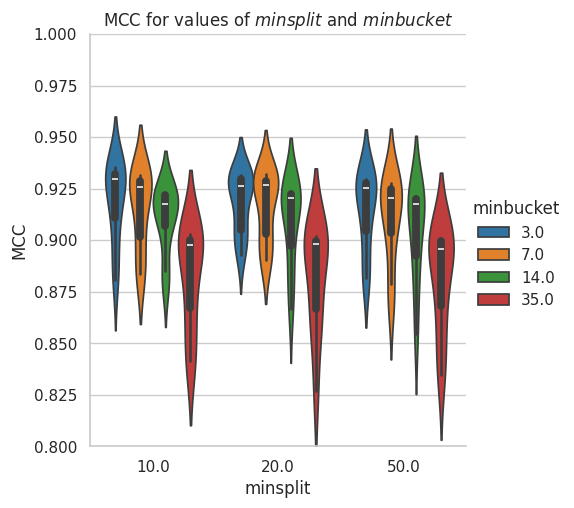

In [5]:
g = sns.catplot(
    x="minsplit",
    y="val_MCC",
    hue="minbucket",
    data=gs,
    kind="violin",
    palette="tab10"
)

g.set_axis_labels("minsplit", "MCC")
# g.set_title("MCC vs minsplit for Differing Numbers of Trees in Validation Data")
# g.set(title="MCC vs minsplit for Differing `minbucket` Values in Validation Data", 
#       ylim=(0.8, 1)
#      )
g.set(title="MCC for values of $\it{minsplit}$ and $\it{minbucket}$", 
      ylim=(0.8, 1)
     )
plt.show()

## Compare ntrees

<>:15: SyntaxWarning: invalid escape sequence '\i'
<>:15: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_1469995/4014992273.py:15: SyntaxWarning: invalid escape sequence '\i'
  g.set(title="MCC for values of $\it{testtype}$ and $\it{ntrees}$",


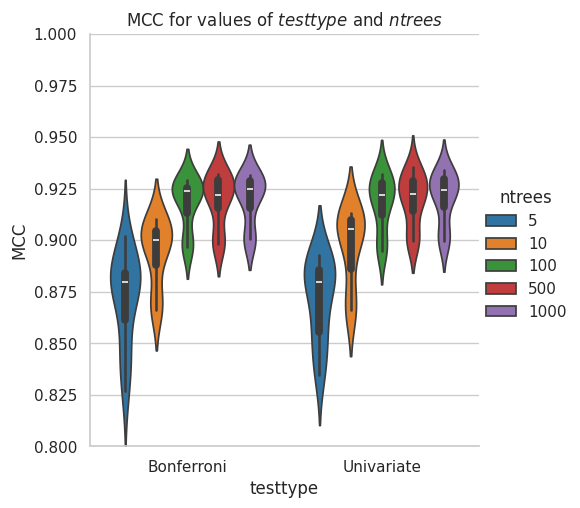

In [6]:
g = sns.catplot(
    x="testtype",
    y="val_MCC",
    hue="ntrees",
    data=gs,
    kind="violin",
    palette="tab10"
)

g.set_axis_labels("testtype", "MCC")
# g.set_title("MCC vs minsplit for Differing Numbers of Trees in Validation Data")
# g.set(title="MCC vs testtype for Differing Numbers of Trees in Validation Data", 
#       ylim=(0.8, 1)
#      )
g.set(title="MCC for values of $\it{testtype}$ and $\it{ntrees}$", 
      ylim=(0.8, 1)
     )
plt.show()

## Parallel Coordinates

In [ ]:
import paxplot

subset = gs[["minsplit", "minbucket", "testtype", "ntrees", "val_MCC"]]
subset = subset.sort_values(by="val_MCC", ascending=False)
cols = subset.columns

subset_hl = subset.iloc[:10]
subset_gr = subset.iloc[11:]

paxfig = paxplot.pax_parallel(n_axes=(len(cols)))
paxfig.plot(subset_hl.to_numpy())

color_col = len(cols) - 1
paxfig.add_colorbar(
    ax_idx=color_col,
    cmap="plasma",
    colorbar_kwargs={"label": "MCC"}
)

paxfig.plot(
    subset_gr.to_numpy(),
    line_kwargs={"alpha": 0.5, "color": "grey", "zorder": 0}
)

# lim of MCC
paxfig.set_lim(ax_idx=4, bottom=0.8, top=0.95)
# ticks of minsplit
paxfig.set_ticks(
    ax_idx=0,
    ticks=[10, 20, 50],
)
# ticks of minbucket
paxfig.set_ticks(
    ax_idx=1,
    ticks=[3, 7, 14, 35],
)
# ticks of ntrees
paxfig.set_ticks(
    ax_idx=3,
    ticks=[5, 10, 100, 500, 1000],
)

paxfig.set_labels(subset.columns)
plt.suptitle("top 10 cforest models by MCC")

## Best model

In [ ]:
gs_by_mcc = gs.sort_values(by="val_MCC", ascending=False)
print(gs_by_mcc.iloc[1])

# Find the best model for small tree gridsearch

## Compare minbucket

In [ ]:
# g = sns.barplot(
#     x="minbucket",
#     y="val_MCC",
#     data=gs,
#     errorbar=None
# )

# g.set_xlabel("minbucket")
# g.set_ylabel("MCC")
# g.set(ylim=(0.8, 0.9))
# plt.show()
# plt.rcParams.update({'font.size': 18})


g = sns.catplot(
    x="minsplit",
    y="val_MCC",
    hue="minbucket",
    data=gs,
    kind="violin",
    palette="tab10"
)

## Compare minsplit

In [ ]:
g = sns.barplot(
    x="minsplit",
    y="val_MCC",
    data=gs,
    errorbar=None
)

g.set_xlabel("minsplit")
g.set_ylabel("MCC")
g.set(ylim=(0.8, 0.9))
plt.show()

# Find the best model for small forest gridsearch

## Compare minbucket

In [ ]:
g = sns.barplot(
    x="minbucket",
    y="val_MCC",
    hue="ntrees",
    data=gs,
    errorbar=None,
    palette="tab10"
)

g.set_xlabel("minbucket")
g.set_ylabel("MCC")
g.set(ylim=(0.8, 1))
plt.show()

## Compare minsplit

In [ ]:
g = sns.barplot(
    x="minsplit",
    y="val_MCC",
    hue="ntrees",
    data=gs,
    errorbar=None,
    palette="tab10"
)

g.set_xlabel("minsplit")
g.set_ylabel("MCC")
g.set(ylim=(0.8, 1))
plt.show()

# Using the best model

In [ ]:
import pickle as pkl
import tomllib

from src.ml.cforest import Cforest
from src.data import Data

# load config
with open("config.toml", "rb") as file:
    config = tomllib.load(file)

# load the microarray data (set in config.toml)
data = Data(config)

# data.replace_sample_sep(".") # only needed with tcga

ma_data = data.get_mm_with_tt()
ma_data.columns = ma_data.columns.str.replace(" ", "_")
print(f"ma_data shape: {ma_data.shape}")

In [ ]:
# cforest = Cforest(data)

# # TCGA forest - Does not matter here and now
# with open("/students/2023-2024/master/dwiersma/output/cforest/20240108121655_46cbcb/cforest_model.pkl", "rb") as file:
#     fitted_model = pkl.load(file)

# cforest.fitted_model = fitted_model

In [ ]:
# ypredict_probs = cforest.predict(newx=ma_data.drop(columns=["response"]), type="prob")
# ypredict = cforest.predict(newx=ma_data.drop(columns=["response"]), type="response")
# cforest.runID = "ma_assessment"
# cforest.assess(ytrue=ma_data["response"], ypredict=ypredict, ypredict_probs=ypredict_probs, name="clustermap_ma")

Hmm that performance isn't very good.
Let's explore some more.

In [ ]:
#pred_df = pd.DataFrame(ypredict_probs)

#top_three = pred_df.apply(lambda x: pd.Series(x.nlargest(3).values), axis=1)
#top_three.columns = ["best", "second_best", "third_best"]

#top_three_melted = top_three.melt(value_name="probability", var_name="rank")

#g = sns.displot(data=top_three_melted, x="probability", hue="rank", kind="hist", fill=True)
#g.set(title="Distribution of Top Three Predictions", xlabel="Predicted Probability", ylabel="Frequency")
#plt.show()

In [ ]:
# top_two_diff = top_three.apply(lambda x: pd.Series(top_three["best"].values - top_three["second_best"].values), axis=1)

#top_two_diff = top_three["best"] - top_three["second_best"]
#top_two_diff = pd.DataFrame(top_two_diff)
#top_two_diff.columns = ["top_two_diff"]
#print(top_two_diff)

#g = sns.displot(data=top_two_diff, x="top_two_diff", kind="hist", fill=True)
#g.set(title="Distribution of the Difference Between the Top Two Predictions", xlabel="Difference in Predicted Probability", ylabel="Frequency")
#plt.show()

# Feature Importance

Feature importance may be calculated like below, but it may take a while. I shall therefore load it from a file.

In [ ]:
# from rpy2 import robjects
# from rpy2.robjects import pandas2ri
# from rpy2.robjects.packages import importr

# importr("partykit")
# robjects.r.assign("best_forest", cforest.fitted_model)

# print(robjects.r("data.frame(varimp(best_forest, cores = 50, conditional = FALSE))"))

## Distribution of cancer types in TCGA and Microarray

### Load TCGA data

In [ ]:
#set the data location to the TCGA mixing matrix
config["data"]["locations"]["mixing_matrix"] = "data/corrected_mixing_matrix.tsv"
config["data"]["locations"]["tumor_types"] = "data/TCGA__Sample_To_TumorType_with_common_cancer_type_mapping_GEO_TCGA.tsv"

config["data"]["columns"]["tumor_types"]["sample_name"] = "ID2"
config["data"]["columns"]["tumor_types"]["response"] = "TYPE3"

# load the tcga data (set in config.toml)
data = Data(config)

data.replace_sample_sep(".")

tcga_data = data.get_mm_with_tt()
print(f"tcga_data shape: {tcga_data.shape}")

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=ma_data, x="response", ax=axes[0])
axes[0].set_title("GPL570 cancer types")
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=90)
axes[0].set_ylim(0, 3500)

sns.countplot(data=tcga_data, x="response", ax=axes[1])
axes[1].set_title("TCGA cancer types")
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis="x", rotation=90)
axes[1].set_ylim(0, 3500)